In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation,BatchNormalization
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
#Matplotlib relies on the Pillow library to load image data.

# import the opencv library
import cv2

In [2]:
# Load age model
model2 = keras.models.load_model('AgeModel/untitled_age_61.h5')

Import Gender model

In [8]:
model1 = keras.models.load_model('GenderModel/gender64_sgd_val_9152_ac_9964.h5')

Capturing video image

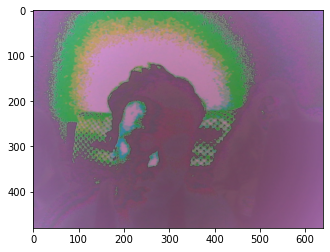

In [9]:
camera = cv2.VideoCapture(0)
for i in range(1):
    return_value, img = camera.read()
    cv2.imwrite('opencv'+str(i)+'.jpg', img)
camera.release()

plt.imshow(img)
plt.show()

image loading and checking

[[0.00208551]]
male


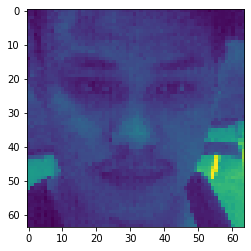

In [5]:
sample_image = cv2.imread('opencv1.jpg')
plt.imshow(sample_image)
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml').detectMultiScale(sample_image,1.2,4)

for (x,y,w,h) in faces:
    cv2.rectangle(sample_image,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = sample_image[y:y+w,x:x+h]
    roi_gray = cv2.resize(roi_gray,(64,64))
    image_pixels = img_to_array(roi_gray)
    image_pixels = np.expand_dims(image_pixels,axis=0)
    image_pixels /=255
   
    predictions = model1.predict(image_pixels)
    print(predictions)
    if predictions[0][0]<=0.5:
        print('male')
    else:
        print('female')
    plt.imshow(roi_gray)

    # predictions2 = model2.predict(image_pixels)
    # predictions2 = np.argmax([predictions2])
    # age_group = ['0-12','12-24','24-36','36-48','48-60','>60']
    
    # print('age-group :' + age_group[predictions2]) 

face detection using webcam
 

In [6]:
# faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# video_capture = cv2.VideoCapture(0)
# while True:
#     # Capture frame-by-frame
#     ret, frame = video_capture.read()
#     sample_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = faceCascade.detectMultiScale(gray,
#                                          scaleFactor=1.1,
#                                          minNeighbors=5,
#                                          minSize=(64, 64),
#                                          flags=cv2.CASCADE_SCALE_IMAGE)
        
#     for (x,y,w,h) in faces:
#         roi_gray = sample_image[y:y+w,x:x+h]
#         roi_gray = cv2.resize(roi_gray,(64,64))
#         image_pixels = img_to_array(roi_gray)
#         image_pixels = np.expand_dims(image_pixels,axis=0)
#         image_pixels /=255

#         predictions = model1.predict(image_pixels) 
#         if predictions[0][0]<=0.5:
#             g ='gender : male ' + str(predictions)
#         else:
#             g = 'gender : female ' + str(predictions)


#         # predictions2 = model2.predict(image_pixels)
#         # predictions2 = np.argmax([predictions2])
#         # age_group = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','>110']
#         # a = 'age-group : '+ str(age_group[predictions2])
        
#         cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)
        
#         #Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
#         cv2.putText(frame, g, (x, y-30), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)
#         # cv2.putText(frame, a, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)
    
#         # Display the resulting frame
#     cv2.imshow('Video', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# video_capture.release()
# cv2.destroyAllWindows()         

oldcodes

In [11]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    grey_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(grey_image,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces:
        roi_gray = grey_image[y:y+w,x:x+h]
        roi_gray = cv2.resize(roi_gray,(64,64))
        image_pixels = img_to_array(roi_gray)
        image_pixels = np.expand_dims(image_pixels,axis=0)
        image_pixels /=255
        cv2.rectangle(frame, (x, y), (x + w, y + h),(0,255,0), 2)

        predictions = model1.predict(image_pixels)
        if predictions[0][0]<=0.5:
            g ='gender : male ' + str(predictions)
        else:
            g = 'gender : female ' + str(predictions)

        
        # predictions2 = model2.predict(image_pixels)
        # predictions2 = np.argmax([predictions2])
        # age_group = ['0-12','12-24','24-36','36-48','48-60','>60']
        # a = 'age-group : '+ str(age_group[predictions2])
        # cv2.putText(frame, a, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)    
        cv2.putText(frame, g, (x, y-30), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)
    
    # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()  